# Introduction:
I built a Convolutional Neural Network to classify CIFAR images. This model refers to the tutorial on https://www.tensorflow.org/tutorials/images/cnn#%E4%B8%8B%E8%BD%BD%E5%B9%B6%E5%87%86%E5%A4%87_cifar10_%E6%95%B0%E6%8D%AE%E9%9B%86. In my model, I modified some functions' arguments.

This is the structure illustration.
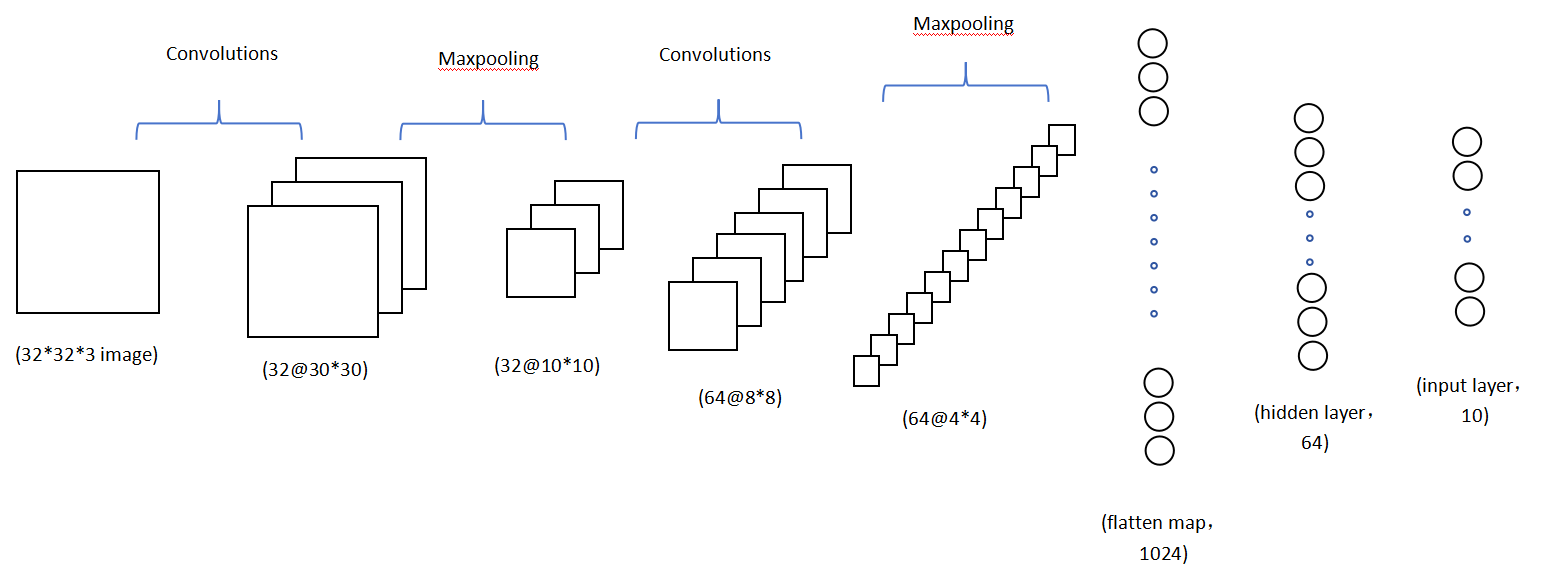

## Connect to my google drive

In [ ]:
# connect to google driv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import packages and functions

In [ ]:
# for data types
import numpy as np

# for CNN creating
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# for visulization
import matplotlib.pyplot as plt

## Load and pre-process the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. Each CIFAR image has the RBG range of 255.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

In [ ]:
# show shapes of train and test sets
print(train_labels.shape)
print(test_labels.shape)

(50000, 1)
(10000, 1)


In [ ]:
# show lables of images
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

0 = airplane, 1 = automobile, 2 = bird, 3 = cat, 4 = deer, 5 = dog, 6 = frog, 7 = horse, 8 = ship, 9 = truck

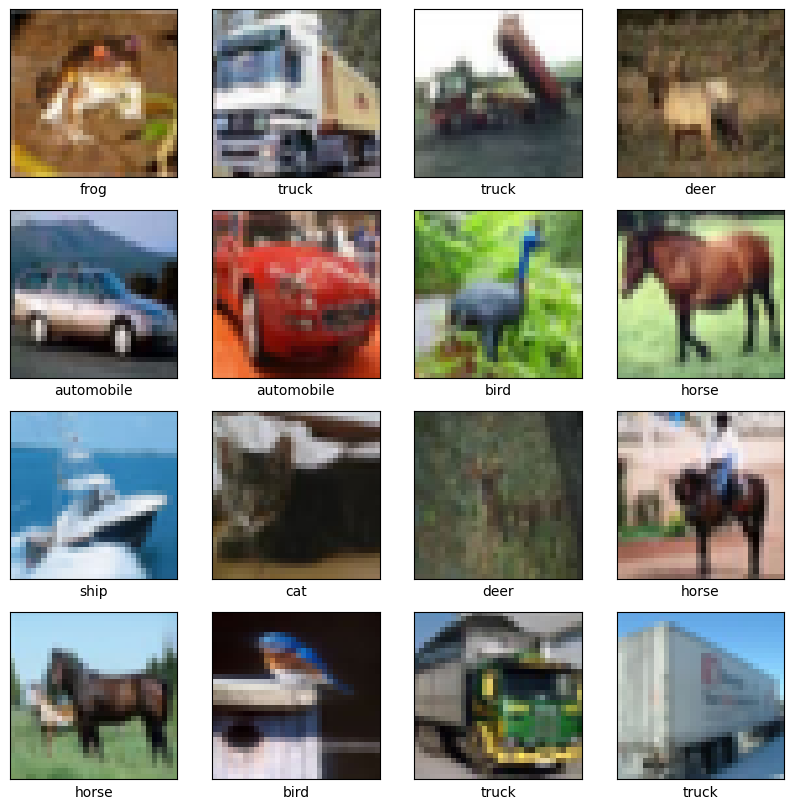

In [ ]:
# glipse images and verify the consistency of labels and images
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(classes[train_labels[i][0]])
plt.show()

## Create the model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# show the architecture of my model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 64)              

In [ ]:
# compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# trian the model
fit = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4933 - accuracy: 0.4609 - val_loss: 1.2612 - val_accuracy: 0.5462
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1583 - accuracy: 0.5915 - val_loss: 1.0939 - val_accuracy: 0.6128
Epoch 3/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0389 - accuracy: 0.6365 - val_loss: 1.0024 - val_accuracy: 0.6538
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9546 - accuracy: 0.6668 - val_loss: 0.9949 - val_accuracy: 0.6560
Epoch 5/15
1563/1563 [==============================] - 34s 21ms/step - loss: 0.8924 - accuracy: 0.6886 - val_loss: 0.9732 - val_accuracy: 0.6692
Epoch 6/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8390 - accuracy: 0.7062 - val_loss: 0.8809 - val_accuracy: 0.6974
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8016 - accuracy: 0.7200 - val_loss: 0.8700 -

## Visulize the learning trajectory

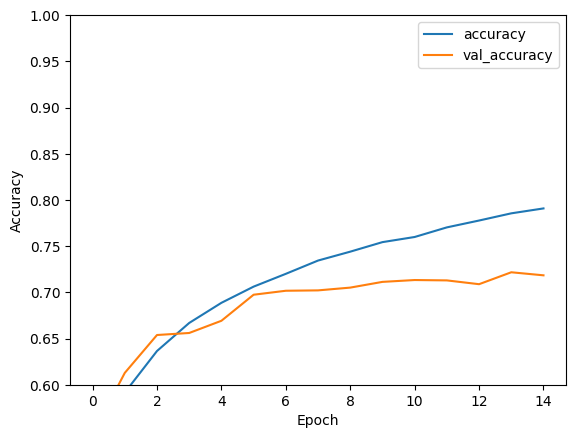

In [ ]:
plt.plot(fit.history['accuracy'], label='accuracy')
plt.plot(fit.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6,1])
plt.legend(loc='upper right')
plt.show()

With the number of epochs increasing, the accuracy of the model increased continuously. But the val_accuracy increased first and then kept around 0.71. It show the model were becoming overfitting as epochs inceased.

## Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.8638 - accuracy: 0.7184


The predicted accuracy for test dataset is 0.7184.

## Post the notebook to my GitHub repository.

In [72]:
%cd /drive/MyDrive/Github/

[Errno 2] No such file or directory: '/drive/MyDrive/Github/'
/content/drive/MyDrive/Github


### Initialize new Git repository

In [73]:
!git init hw_colab

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Github/hw_colab/.git/


In [74]:
%cd hw_colab/

/content/drive/MyDrive/Github/hw_colab


In [75]:
%ls -a

.git/  hw_CNN_lihao.ipynb


In [76]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hw_CNN_lihao.ipynb

nothing added to commit but untracked files present (use "git add" to track)
